In [1]:
require "torch"
require "cutorch"
require "nn"
require "cunn"
require "cudnn"
gm = require "graphicsmagick"
data = require "data"
helpers = require "helpers"

args = {conf = 'conf.json'}
opts = helpers.opts(args)

trainData = data.new(opts.trainDir, opts.height, opts.width)
trainData:normalize(opts.mean, opts.std)

Train	Valid.	Height	Width	
5635	0	200	280	


In [3]:
model = 'out/2016-08-03-spatial/model_12000.t7'
net = torch.load(model)
modelName = string.match(model, '(.*)%.t7$')

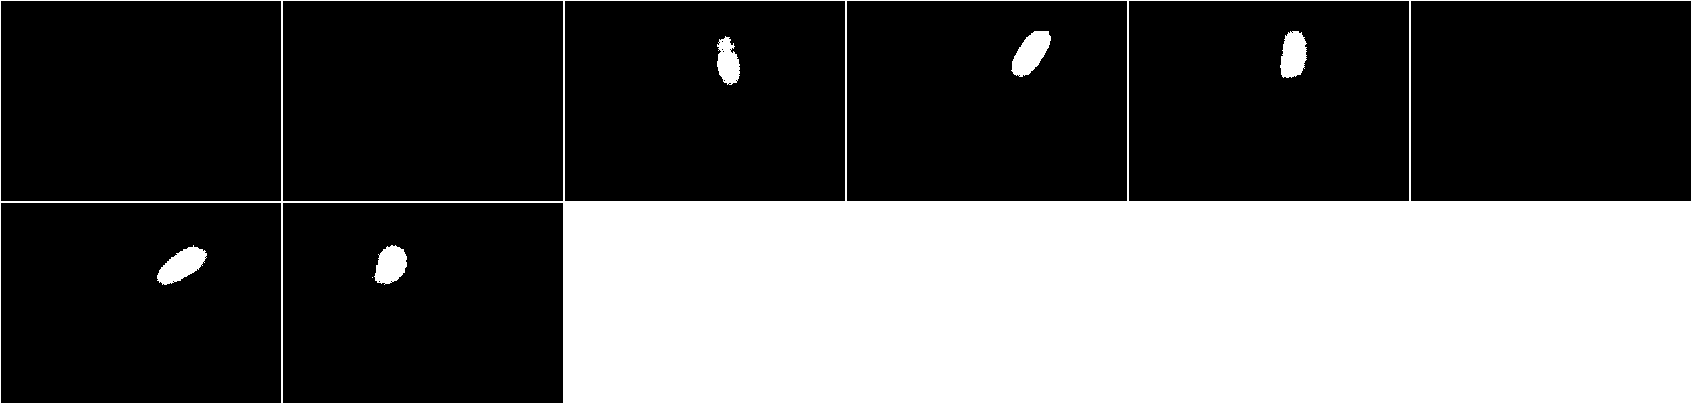

In [10]:
batch, names = trainData:batch(opts.batchSize, true, true)
batchInputs = batch.inputs:cuda()
outputs = net:forward(batchInputs)
_, predictions = outputs:max(outputs:dim() - 2)
predictions = predictions:squeeze():int() - 1
itorch.image(predictions)

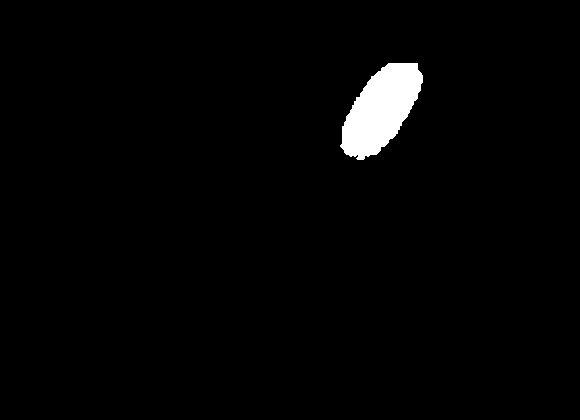

41,28,142946 2 143365 4 143767 23 144187 24 144603 31 145022 33 145437 39 145856 40 146275 41 146694 43 147111 47 147530 48 147946 51 148366 51 148782 56 149202 56 149618 59 149679 1 150038 58 150098 3 150458 63 150878 63 151294 67 151713 68 152132 69 152549 72 152968 72 153387 70 153806 71 154223 75 154642 76 155061 76 155480 76 155897 79 156317 79 156737 79 157156 80 157575 81 157994 82 158413 82 158832 82 159252 81 159672 80 160089 79 160508 80 160928 80 161348 80 161767 80 162186 80 162605 80 163024 80 163444 77 163864 76 164284 76 164704 76 165124 75 165544 74 165964 73 166384 71 166804 71 167224 67 167644 67 168064 63 168484 63 168904 59 169324 58 169744 57 170164 56 170584 55 171004 54 171424 51 171844 50 172264 47 172684 46 173104 43 173524 42 173944 38 174364 38 174784 37 175204 36 175631 23 176052 21 176473 19 176894 11 177316 8


In [20]:
local i = 4
local pred = predictions[i]
local name = names[i]
local predStretch = torch.Tensor(1, pred:size(1), pred:size(2))
predStretch[1] = pred
-- Resize image to original size
if not args.no_resize then
    local img = gm.Image(predStretch, 'I', 'DHW'):
        size(trainData.owidth, trainData.oheight)
    pred = img:toTensor('double', 'I', 'HW'):squeeze():round():int()
end
-- Different name style for file output for test data
if string.match(name, '%d+_%d+') then
    local subject, image = string.match(name, '(%d+)_(%d+)')
    name = subject .. ',' .. image
end
itorch.image(pred)
-- Output run length encoded data
local output = helpers.encode(pred)
io.write(name, ',', string.match(output, '^(.-)%s?$'), '\n')